In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=400,n_classes=2,n_features=3,n_informative=2,n_redundant=0,n_clusters_per_class=2)

In [2]:
x[:5,]

array([[ 2.69119679, -0.5420518 , -0.75875543],
       [-0.49213235,  2.71081244,  0.4373788 ],
       [-0.49376212, -1.28701719,  0.61416424],
       [-1.12925862,  0.07654688, -1.75492343],
       [-0.31966851,  1.87018838, -0.2699957 ]])

In [3]:
y.shape

(400,)

In [4]:
y[:5]

array([1, 0, 1, 0, 0])

In [5]:
x[:,0].mean()

0.02311313308414735

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Count'>

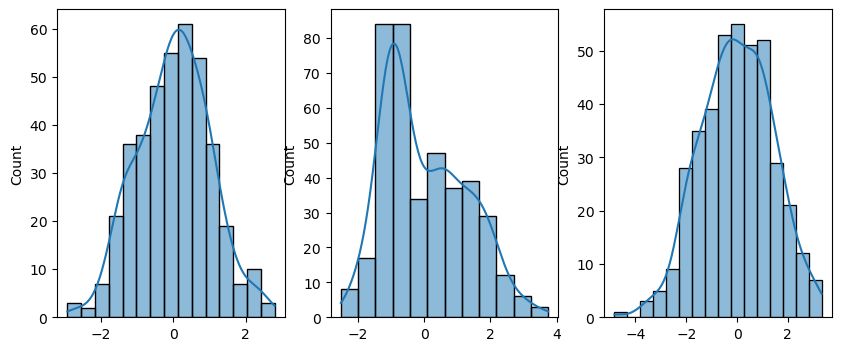

In [7]:
figure, axes=plt.subplots(nrows=1,ncols=3,figsize=(10,4))
sns.histplot(x[:,0],kde=True,ax=axes[0])
sns.histplot(x[:,1],kde=True,ax=axes[1])
sns.histplot(x[:,2],kde=True,ax=axes[2])

<Axes: ylabel='Count'>

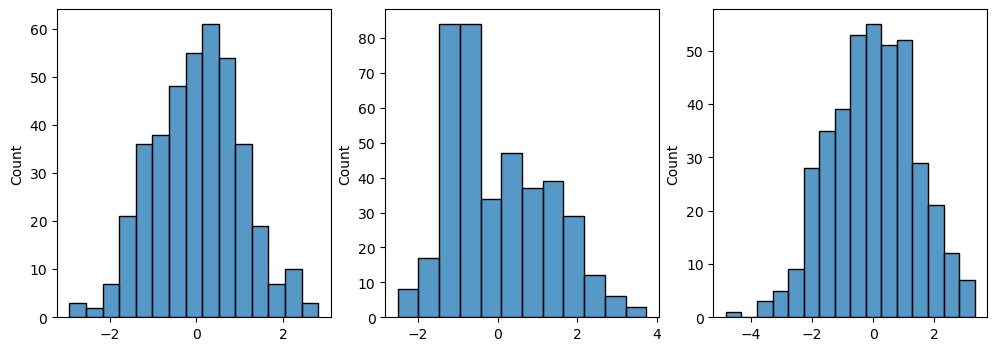

In [8]:
figure, axes=plt.subplots(nrows=1,ncols=3,figsize=(12,4))
sns.histplot(x[:,0],ax=axes[0])
sns.histplot(x[:,1],ax=axes[1])
sns.histplot(x[:,2],ax=axes[2])

<Axes: >

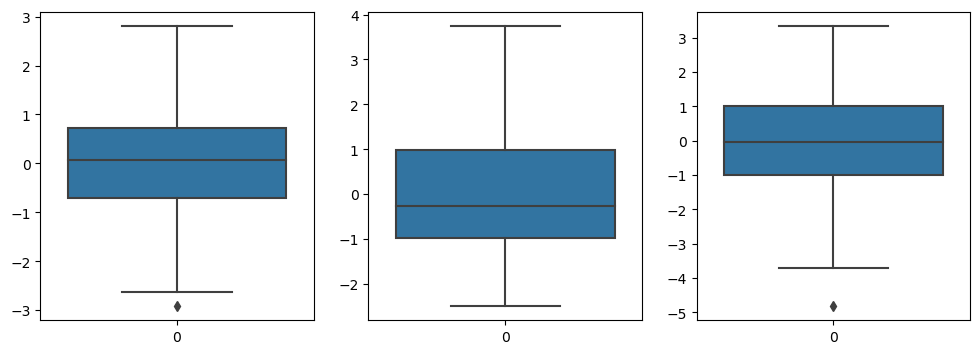

In [9]:
figure, axes=plt.subplots(nrows=1,ncols=3,figsize=(12,4))
sns.boxplot(x[:,0],ax=axes[0])
sns.boxplot(x[:,1],ax=axes[1])
sns.boxplot(x[:,2],ax=axes[2])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [12]:
gb=GaussianNB()
bb=BernoulliNB()
lg=LogisticRegression()
gb.fit(x_train,y_train)
bb.fit(x_train,y_train)
lg.fit(x_train,y_train)

LogisticRegression()

# Train Model Accuracy

In [13]:
gb.score(x_train,y_train)

0.8285714285714286

In [14]:
bb.score(x_train,y_train)

0.8357142857142857

In [15]:
lg.score(x_train,y_train)

0.8392857142857143

# Predict Model Accuracy

In [16]:
y_pred1=gb.predict(x_test)
y_pred2=bb.predict(x_test)
y_pred3=lg.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_roc_curve


In [18]:
accuracy_score(y_test,y_pred1)

0.8833333333333333

In [19]:
accuracy_score(y_test,y_pred2)

0.875

In [20]:
accuracy_score(y_test,y_pred3)

0.8833333333333333

In [21]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        65
           1       0.85      0.91      0.88        55

    accuracy                           0.88       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120



In [22]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        65
           1       0.84      0.89      0.87        55

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.87       120
weighted avg       0.88      0.88      0.88       120



In [23]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        65
           1       0.86      0.89      0.88        55

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



<Axes: >

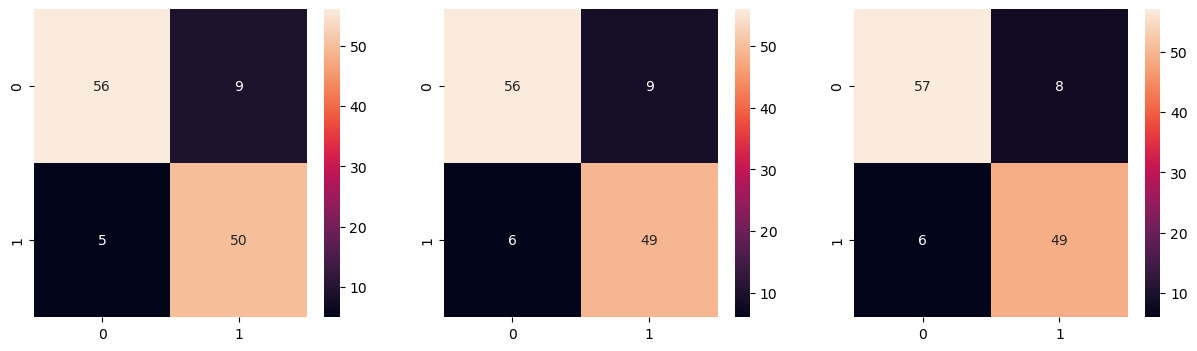

In [24]:
figure, axes=plt.subplots(nrows=1,ncols=3,figsize=(15,4))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,ax=axes[0])
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,ax=axes[1])
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,ax=axes[2])

In [25]:
fig = plot_roc_curve(gb,x_test,y_test)
fig = plot_roc_curve(bb,x_test,y_test,ax= fog.ax_)
fig = plot_roc_curve(lg,x_test,y_test,ax= fog.ax_)
fig.figure_.suptitle("ROC curve comparsion")
plt.show()

C:\Users\User\anaconda\envs\mbdiploma\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


InvalidParameterError: The 'pos_label' parameter of roc_curve must be an instance of 'float', an instance of 'str', an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int' or None. Got GaussianNB() instead.

In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

# Assuming you have three classifiers: gb, bb, and lg

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axes

# Plot ROC curves for each classifier
plot_roc_curve(gb, x_test, y_test, ax=ax, name='Gradient Boosting')
plot_roc_curve(bb, x_test, y_test, ax=ax, name='Bagging')
plot_roc_curve(lg, x_test, y_test, ax=ax, name='Logistic Regression')

# Set the title and labels
ax.set_title("ROC Curve Comparison")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

# Show the legend
ax.legend()

plt.show()

In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

# Assuming you have three classifiers: gb, bb, and lg

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axes

# Plot ROC curves for each classifier
plot_roc_curve(gb, x_test, y_test, ax=ax, name='Gradient Boosting')
plot_roc_curve(bb, x_test, y_test, ax=ax, name='Bagging')
plot_roc_curve(lg, x_test, y_test, ax=ax, name='Logistic Regression')

# Set the title and labels
ax.set_title("ROC Curve Comparison")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

# Show the legend
ax.legend()

plt.show()